In [1]:
import sys
sys.path.append('../')
import pandas as pd
import csv
import matplotlib.pyplot as plt
# import ipywidgets as widgets
from IPython.display import display


In [2]:
from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot
import neat
import dill
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
import sgr_main as sgr
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import evogym.envs

In [3]:
# base_path = "../results_multiple_neat/"
# base_path = "../results/"
# base_path = "../results_single_neat/"
base_paths = [
    "../results_multiple_neat/",
    "../results/",
    "../results_single_neat/"
]

envs = [
    "Walker-v0",
    "ObstacleTraverser-v1",
    "Climber-v2",
    "Carrier-v0",
    "Thrower-v0",
]

runs = [
    "run_1",
    "run_2",
    "run_3",
    "run_4",
    "run_5",
] 

STEPS = 600
ROBOT_SIZE = 5
POP = 128

In [4]:
defaultGen = neat.DefaultGenome
params = {"robot_size": ROBOT_SIZE, "steps": STEPS, "pop_size": POP, "robot_substrate": "CPPN"}
f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
defaultGen.distance = f
neat_config = neat.config.Config(
    defaultGen,
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_config_CPPN_robot"
)

In [5]:
col_names = []

dfs = {e: {p: {r: None for r in runs} for p in base_paths} for e in envs}
pops = {e: {p: {r: None for r in runs} for p in base_paths} for e in envs}
    
for env in envs:
    for path in base_paths:
        for r in runs:
            df_file_name = path + env + "/" + r + "_table.csv"
            try: 
                df = pd.read_csv(df_file_name, sep=';')
            except:
                df = None
            dfs[env][path][r] = df

            pop_file_name = path + env + "/" +r + "_pop.pkl"
            try: 
                with open(pop_file_name, "rb") as file:
                    pops[env][path][r] = dill.load(file)
            except:
                pops[env][path][r] = None

In [6]:
def plot_graphs(dfs, runs, gen_range, col):
    
    plt.rcParams['figure.figsize'] = [14, 6]
    for path in dfs:
        steps = [i for i in range(gen_range[0], gen_range[1])]
        avg_arr = []
        min_arr = []
        max_arr = []

        for row in steps:
            values = []
            for r in runs:
                if dfs[path][r] is None or len(dfs[path][r][col]) == 0:
                    continue
                max_row = len(dfs[path][r][col])
                if max_row > row:
                    values.append(dfs[path][r][col][row])
                else:
                    values.append(dfs[path][r][col][max_row-1])
            avg_arr.append(sum(values)/len(values))
            min_arr.append(min(values))
            max_arr.append(max(values))

        plt.plot(steps, avg_arr, lw =1.3, label=path)
        plt.fill_between(steps, min_arr,max_arr, alpha = 0.15)

    plt.xlabel("Generations")
    plt.ylabel(col)
    plt.legend(loc="upper left")
    plt.show()

In [7]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

!!!!!!!!!!!!!!!!!!!!!!Walker-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


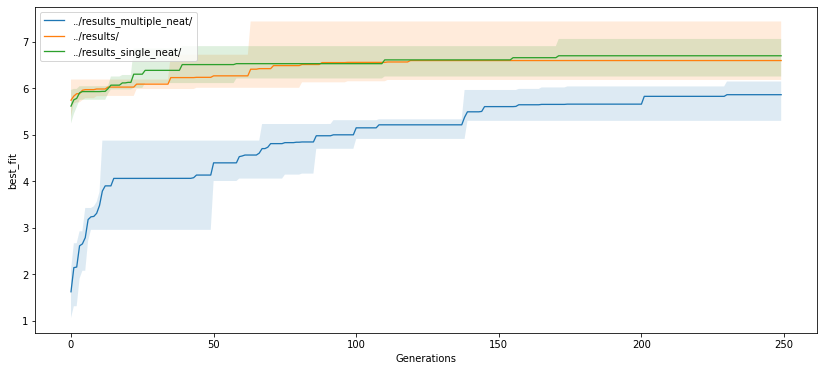

!!!!!!!!!!!!!!!!!!!!!!ObstacleTraverser-v1!!!!!!!!!!!!!!!!!!!!!!!!!!


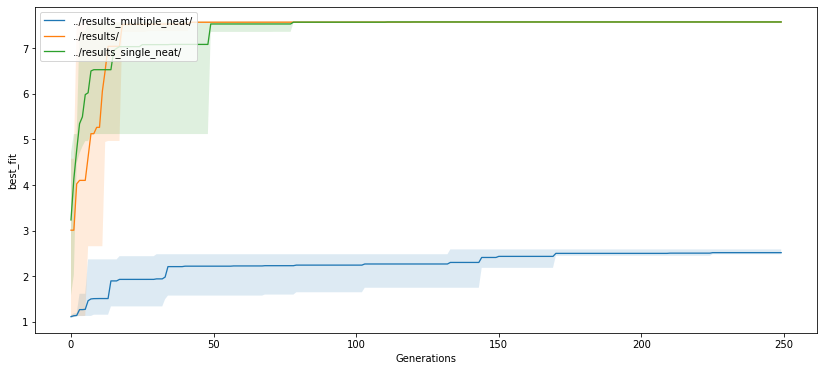

!!!!!!!!!!!!!!!!!!!!!!Climber-v2!!!!!!!!!!!!!!!!!!!!!!!!!!


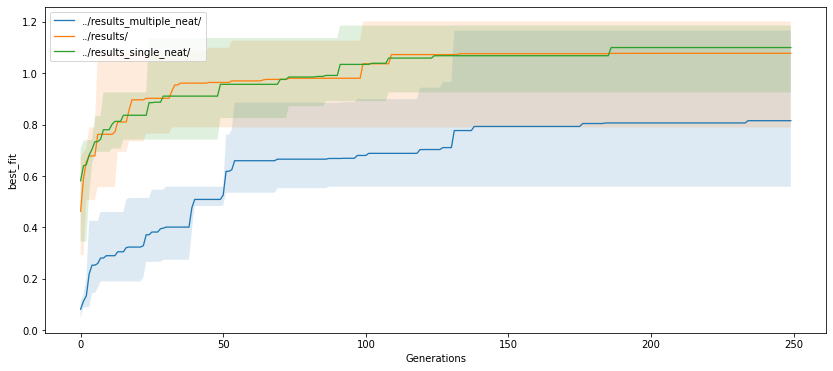

!!!!!!!!!!!!!!!!!!!!!!Carrier-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


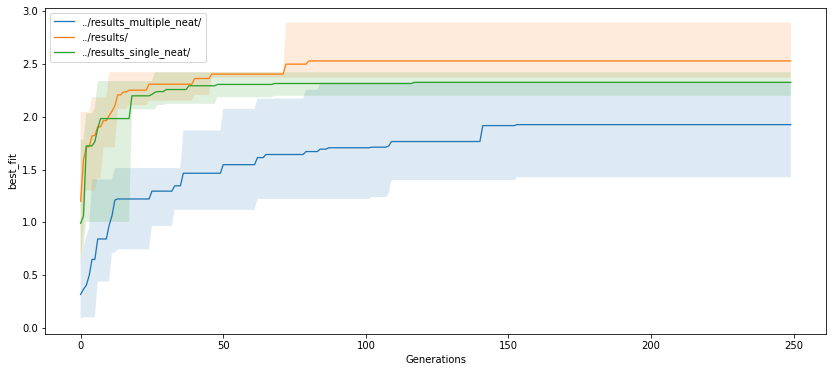

!!!!!!!!!!!!!!!!!!!!!!Thrower-v0!!!!!!!!!!!!!!!!!!!!!!!!!!


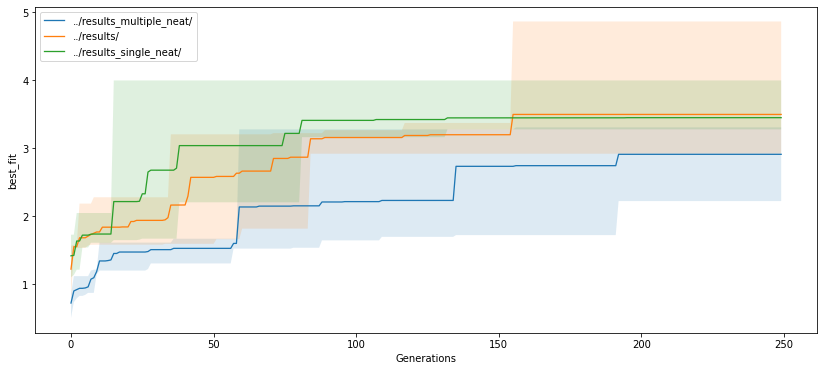

In [8]:
cols = ['pop_size', 'best_fit', 'num_species']

for e in envs:
    print(f"!!!!!!!!!!!!!!!!!!!!!!{e}!!!!!!!!!!!!!!!!!!!!!!!!!!")
    plot_graphs(dfs[e], runs, [0, 250], "best_fit")
    
#     params["env"] = e
#     for t in tests:
#         champion = pops[e][t].best_genome
#         r, img = get_robot(champion, params, neat_config)
#         plt.rcParams['figure.figsize'] = [7, 4]
#         plt.imshow(img)
#         plt.show()

2.8930274816651154
2.3917996379317796
2.4231930071962346
2.564071961121056
2.3703880743940147
!!!!!!!!!!!!!!!!!!!!!!!! Specie  65 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  66 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  63 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 18379: 0.3818890397873108


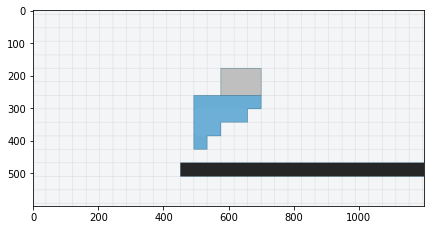

!!!!!!!!!!!!!!!!!!!!!!!! Specie  67 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 18217: -0.07987367049399308


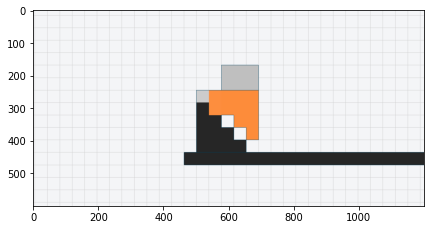

!!!!!!!!!!!!!!!!!!!!!!!! Specie  61 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 18059: 0.013090772006471532


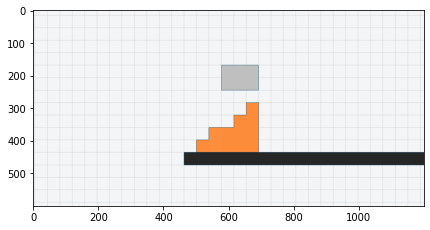

!!!!!!!!!!!!!!!!!!!!!!!! Specie  56 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 17141: 0.12384438364298134


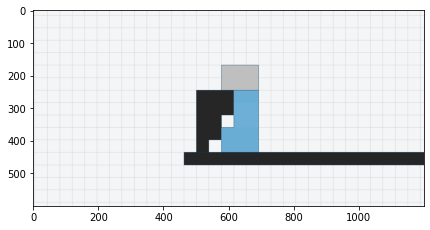

!!!!!!!!!!!!!!!!!!!!!!!! Specie  57 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 17897: 0.21940487304888326


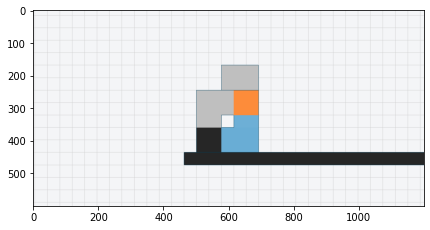

!!!!!!!!!!!!!!!!!!!!!!!! Specie  62 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 17396: 0.3047396991779031


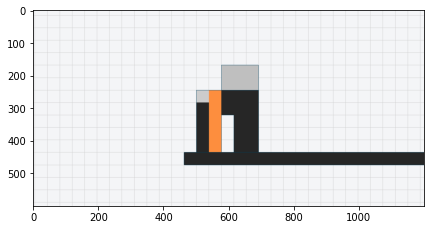

!!!!!!!!!!!!!!!!!!!!!!!! Specie  48 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 16758: 0.3428492092168857


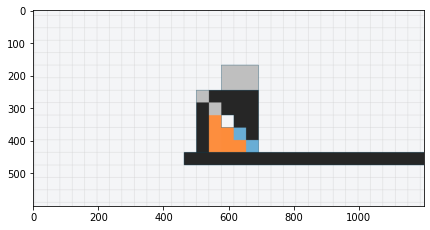

!!!!!!!!!!!!!!!!!!!!!!!! Specie  59 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 18316: 0.5206848528522428


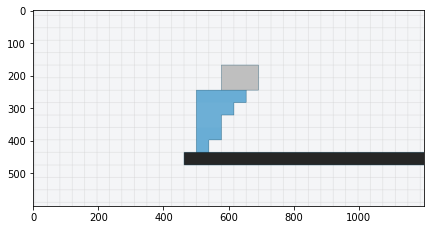

!!!!!!!!!!!!!!!!!!!!!!!! Specie  60 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 15908: 0.5899700818667166


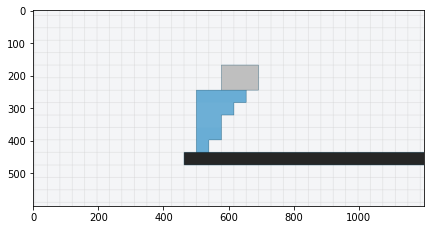

!!!!!!!!!!!!!!!!!!!!!!!! Specie  55 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 17510: 0.7587193132028188


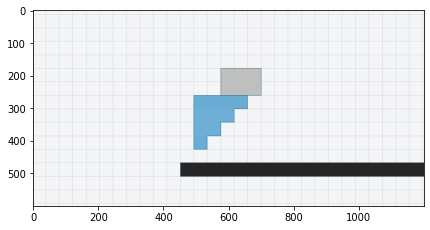

!!!!!!!!!!!!!!!!!!!!!!!! Specie  64 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 16331: 0.8707915015880634


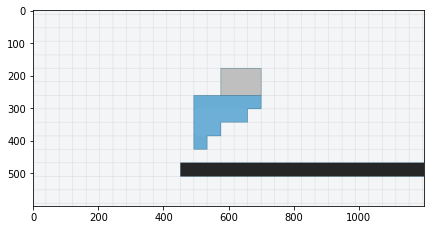

!!!!!!!!!!!!!!!!!!!!!!!! Specie  35 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 16654: 1.2562658032794958


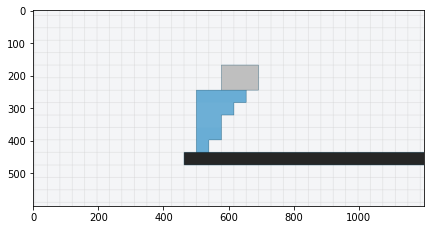

!!!!!!!!!!!!!!!!!!!!!!!! Specie  58 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 16905: 1.9390090674221239


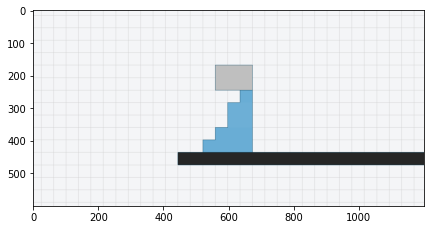

!!!!!!!!!!!!!!!!!!!!!!!! Specie  28 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 8111: 2.8930274816651154


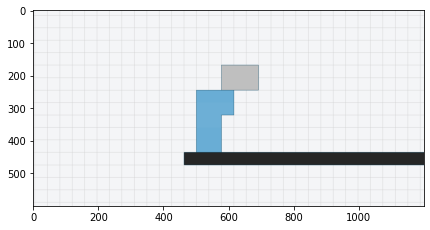

In [13]:
# envs = [
#     "Walker-v0",
#     "ObstacleTraverser-v1",
#     "Climber-v2",
#     "Carrier-v0",
#     "Thrower-v0",
#     "Balancer-v1",
# ]

env = envs[3]
params["env"] = env
plt.rcParams['figure.figsize'] = [7, 4]
# for i in pops[env]:
#     print(pops[env][i].best_genome.fitness)

p = base_paths[1]
for k, v in pops[env][p].items():
    print(v.best_genome.fitness)
best_run = max(pops[env][p], key = lambda r: pops[env][p][r].best_genome.fitness)
pop = pops[env][p][best_run]
for k, v in pop.species.species.items():
    print("!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    c = max(v.members.values(), key = lambda x : x.fitness if x.fitness != None else -1000)
    r, img = get_robot(c, params, neat_config)
    if img is not None:
        print(f"genome {c.key}: {c.fitness}")
        plt.imshow(img)
        plt.show()

In [14]:
g = pop.best_genome
# g = pop.population[24256]
params["save_to"] = "exploting_env"
sgr.single_genome_fit(g, params, neat_config, True, False)

(2.8930274816651154, True)